## Model Interpretation & Insights

### Interpretation of model
Here we understand the reason behind machine learning model which we have trained. We have trained around 12 models in previous notebook. But will understand about only top 3 model.

Which are Ada Boost Classifier (29 KB), Gradient Boosting Classifier (137 KB), and Extra Tree Classifier (379 KB), i also choose these models as they have least size relative to other models.

Let's start with model loading.

In [3]:
import pickle

FINAL_FOLDER_NAME = "../Final_Model"
FOLDER_NAME = "../Models"
MODELS_NAMES = ["Ada_B", "Gradient B", "Extra tree"]
MODELS = {}

for EACH_MODEL_NAME in MODELS_NAMES:
    with open(f"{FOLDER_NAME}/{EACH_MODEL_NAME}.pkl", "rb") as file:
        MODELS[f"{EACH_MODEL_NAME}_classifier"] = pickle.load(file)

        print(f"Imported {EACH_MODEL_NAME} as variable {EACH_MODEL_NAME} in dict.")

Imported Ada_B as variable Ada_B in dict.
Imported Gradient B as variable Gradient B in dict.
Imported Extra tree as variable Extra tree in dict.


### Tree type model
For tree based model we will use `feature_importances_`. and plot each feature importance with column.

In [4]:
importance_ = MODELS['Extra tree_classifier'].feature_importances_
features_ = MODELS['Extra tree_classifier'].feature_names_in_

In [5]:
importance_

array([0.03025997, 0.03256307, 0.02117647, 0.02674854, 0.12400169,
       0.00027416, 0.02999531, 0.03376705, 0.01728358, 0.02152078,
       0.02059881, 0.02913411, 0.03681062, 0.11849557, 0.14727509,
       0.01822788, 0.00428064, 0.01042674, 0.        , 0.0911882 ,
       0.0090614 , 0.1092669 , 0.00326657, 0.00696378, 0.01179665,
       0.01499799, 0.01865248, 0.01196596])

In [6]:
features_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [10]:
import pandas as pd

importance_df = pd.DataFrame(
    {
        "features": features_,
        "importance": importance_,
    }
).sort_values(by="importance", ascending=False)

In [11]:
importance_df.head()

,features,importance
14,TotalCharges,0.147275
4,tenure,0.124002
13,MonthlyCharges,0.118496
21,Contract_Month-to-month,0.109267
19,InternetService_Fiber optic,0.091188


This shows importance value of each column. By using this we can reiterate model development, this will reduce model training time and can improve accuracy and also reduce model size. 

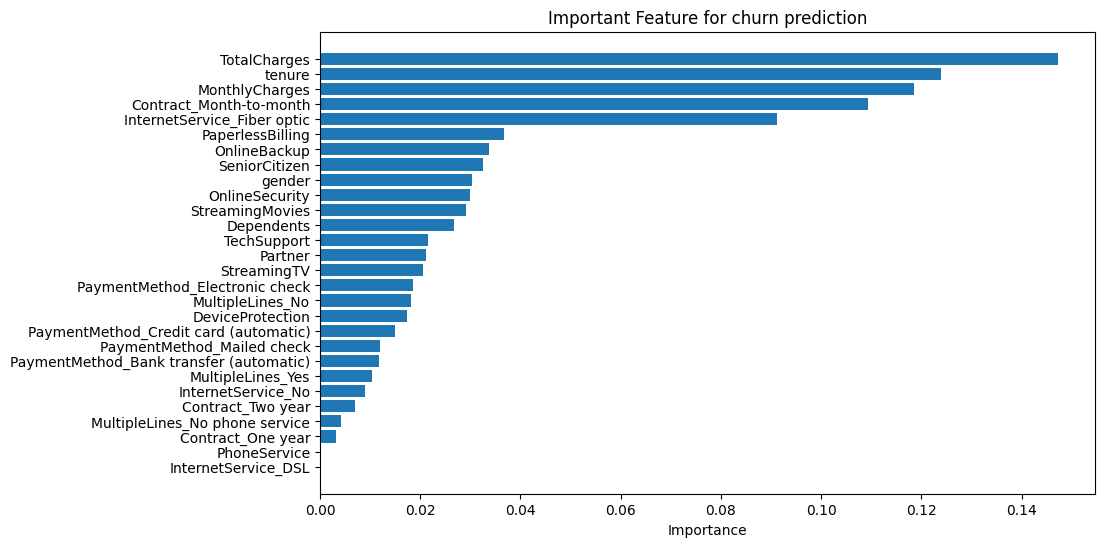

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df["features"], importance_df["importance"])
plt.title("Important Feature for churn prediction")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

This shows that two columns PhoneService, InternetService_DSL doesn't affect the model prediction at all. So, we can remove it.

According to this model, it's clear that `TotalCharges, tenure, MonthlyCharges, Contract_Month_to_Month, InternetService_Fiber_optic` are the top 5 parameters which affect churning. But this doesn't show whether these parameters affect churning positivly or negitivly.

### NN and Gradient Based Model

For this we will use SHAP (Shapley additive explanations) library, which explains output of any model.

In [ ]:
import snap

